In [10]:
%matplotlib inline
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

## Demostration

#### Functions

In [5]:
"""
lennardJones = a/r^12 - b/r^6;
force = -D[lennardJones, 
    r]; (*La force est la derivée (en 1D) du potentiel*)
"""

def lennardJones(a, b):
    return lambda r: a / pow(r, 12) - b / pow(r, 6)

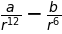

In [50]:
a, b, r = symbols("a b r")
init_printing(use_unicode=True)

lennardJones = a/r**12 - b/r**6
lennardJones

In [28]:
force = -lennardJones.diff(r)
forceres = force.subs({a:1, b:2, r:3})
forceres

In [19]:
"""
equationDistanceMinimum = (force /. r -> rMin) == 0
equationEnergieMinimum = (lennardJones /. r -> rMin) == -eMin;
criticalPointSolutions = 
Solve[{equationDistanceMinimum, equationEnergieMinimum}, {a, b}];

"""

'\nequationDistanceMinimum = (force /. r -> rMin) == 0\n\n\n'

In [54]:
rMin = symbols('rMin')

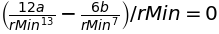

In [56]:
equationDistanceMinimum = Eq(force.subs({r: rMin}) / rMin, 0)
equationDistanceMinimum

In [66]:
#equationEnergieMinimum = (lennardJones /. r -> rMin) == -eMin;
eMin = symbols('eMin')
equationEnergieMinimum = Eq(lennardJones.subs({r:rMin}), -eMin)

In [67]:
criticalPoints = solve([equationDistanceMinimum, equationEnergieMinimum], a, b)
criticalPoints

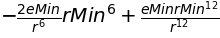

In [68]:
lennardJonesCritical = lennardJones.subs(criticalPoints)
lennardJonesCritical

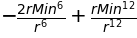

In [124]:
lennardJonesScaled = expand(lennardJonesCritical / eMin)
lennardJonesScaled

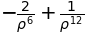

In [123]:
rho = symbols('rho')
energy = expand(lennardJonesScaled.subs({r: rho * rMin}))
energy

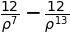

In [79]:
forceScaled = expand(energy.diff(rho))
forceScaled

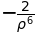

In [122]:
energyAttractive = expand(lennardJonesScaled.subs({r: rho * rMin})).as_terms()[0][1][0]
energyAttractive

In [125]:
energyRepulsive = expand(lennardJonesScaled.subs({r: rho * rMin})).as_terms()[0][0][0]
energyRepulsive

In [126]:
forceScaledAttractive = expand(forceScaled.subs({r: rho * rMin})).as_terms()[0][1][0]
forceScaledAttractive

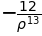

In [127]:
forceScaledRepulsive = expand(forceScaled.subs({r: rho * rMin})).as_terms()[0][0][0]
forceScaledRepulsive

#### Graphics

In [133]:
from mpmath import *

In [151]:
parabolaApproximation = series(energy, rho, n=3, x0=1).removeO()
parabolaApproximation

In [152]:
cubicApproximation = series(energy, rho, n=4, x0=1).removeO()
cubicApproximation